In [37]:
import numpy as np
logits = np.stack([1/euclidean_dist(point,centroids["0"]) for point in points])
sum_softmax = sum(np.exp(logits))
probs = np.exp(logits) / sum_softmax
np.random.choice(obj_list, p=dist[0])

In [39]:
probs

array([6.61658186e-184, 6.66667510e-184, 6.63729459e-184, ...,
       6.53756551e-184, 6.76705974e-184, 6.62201658e-184])

In [34]:
euclidean_dist(points[0],centroids["0"])

21.842035279384092

In [52]:
centroids

{'0': array([1.30885016, 0.38075074]),
 '1': array([ 2.28238363, -0.68162376]),
 '2': nan,
 '3': array([-0.20525852,  2.03133431])}

In [59]:
import numpy as np
from IPython.display import clear_output
import random

K = 4
N = 2000
iterations = 100

def euclidean_dist(a,b):
    return np.dot(b-a,(b-a).T)


def gradient_descent(centroid, cluster_points, lr=1e-5):
    gradient = np.array([0.,0.])
    loss = np.array([0.])
    for cluster_point in cluster_points:
        gradient += - 2*(centroid-cluster_point)
        loss += (centroid-cluster_point) @ (centroid-cluster_point).T
    centroid = centroid + lr * gradient
    return centroid, loss

def centroid_computation(cluster_points, lr=1e-5):
    return np.mean(cluster_points,axis = 0)

def cluster_assignment(centroids,points):
    clusters = {k:[] for k in centroids}
    for point in points:
        min_dist = float("inf")
        for centroid,centroid_points in centroids.items():
            dist = euclidean_dist(point,centroid_points)
            if dist < min_dist:
                assigned_centroid = centroid
                min_dist = dist
        clusters[assigned_centroid].append(point)
    return clusters

def random_init(points,k):
    centroids = random.sample(list(points),k)
    return {f"{i}":c for i,c in enumerate(centroids)}

def plusplus_init(points,k):
    centroids = [points[np.random.choice(range(len(points)))]]
    for i in range(1,k):
        logits = np.stack([max(1/min([euclidean_dist(point,centroid) if (point-centroid).any() else 0 for centroid in centroids ]) for point in points])
        probs = logits / sum(logits)
        centroid = points[np.random.choice(range(len(points)),p=probs)]
        centroids.append(centroid)
    return {f"{i}":c for i,c in enumerate(centroids)}


points =          [[random.random()*2,random.random()*10 - 5] for _ in range(N//3)] + \
                  [[random.random()*10 - 5,random.random()*1 + 1] for _ in range(N//3)] + \
                  [[random.random()*3 + 0,random.random()*3 + 0] for _ in range(N//3)]


points = np.array(points)


for i in range(iterations):
    if i == 0:
        centroids = plusplus_init(points,K)

    # minimization by assignment (points)
    clusters = cluster_assignment(centroids, points)

    # minimization by gradient descent (centroid)
    for clust in centroids.keys():
        prior_loss = float("inf")
        loss = 0
        while abs(loss-prior_loss)>0.01:
            prior_loss = loss
            centroids[clust], loss = gradient_descent(centroids[clust],clusters[clust],lr=0.0001)
    # minimization by mean
    for clust in centroids.keys():
        centroids[clust] = centroid_computation(clusters[clust])

    import matplotlib.pyplot as plt

    # Set the colors using tab:10
    colors = plt.cm.tab10.colors

    # Create a scatter plot for each cluster
    for i, cluster_points in clusters.items():
        x = [point[0] for point in cluster_points]
        y = [point[1] for point in cluster_points]
        plt.scatter(x, y, color=colors[int(i)], s=4)

    # Create a scatter plot for the centroids with bigger black border
    for i, centroid in centroids.items():
        plt.scatter(centroid[0], centroid[1], color=colors[int(i)], edgecolors='black', linewidths=1, s=40)

    # Set the x and y limits
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Set the ticks using a 2 by 2 linespace
    plt.xticks(range(-10, 11, 2))
    plt.yticks(range(-10, 11, 2))

    # Show the plot
    plt.show()
    clear_output(wait=True)

UnboundLocalError: cannot access local variable 'centroid' where it is not associated with a value

In [28]:
for clust in centroids.keys():
    prior_loss = float("inf")
    loss = 0
    while abs(loss-prior_loss)>0.01:
        prior_loss = loss
        centroids[clust], loss = gradient_descent(centroids[clust],clusters[clust],lr=0.001)
    print(round(loss[0],2))

200.62
5699.98
0.0


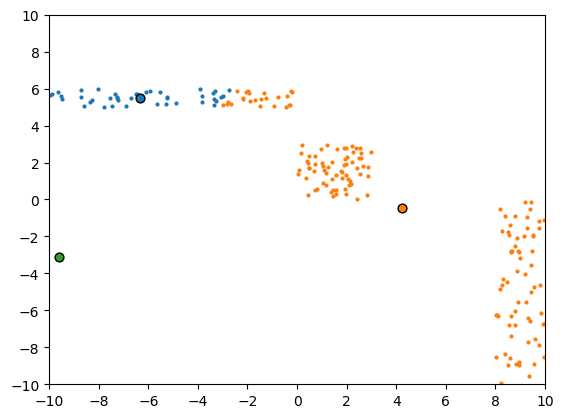

In [29]:
import matplotlib.pyplot as plt

# Set the colors using tab:10
colors = plt.cm.tab10.colors

# Create a scatter plot for each cluster
for i, cluster_points in clusters.items():
    x = [point[0] for point in cluster_points]
    y = [point[1] for point in cluster_points]
    plt.scatter(x, y, color=colors[int(i)], s=4)

# Create a scatter plot for the centroids with bigger black border
for i, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], color=colors[int(i)], edgecolors='black', linewidths=1, s=40)

# Set the x and y limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Set the ticks using a 2 by 2 linespace
plt.xticks(range(-10, 11, 2))
plt.yticks(range(-10, 11, 2))

# Show the plot
plt.show()